In [1]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [2]:
#Pulling Datasets from Github
oecd = pd.read_csv(r"https://raw.githubusercontent.com/alexsloan492/GDP_OECD/main/oecd_bli_2015.csv")

gdp = pd.read_csv(r"https://raw.githubusercontent.com/alexsloan492/GDP_OECD/main/gdp_per_capita.csv")

In [3]:
#Taking a look at both Datasets
display(oecd.head(5), gdp.head(5))

,Unnamed: 0,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


,Unnamed: 0,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [4]:
#Prep work function for OECD df and GDP df
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
#Prep the data
country_stats = prepare_country_stats(oecd,gdp)
display(country_stats)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


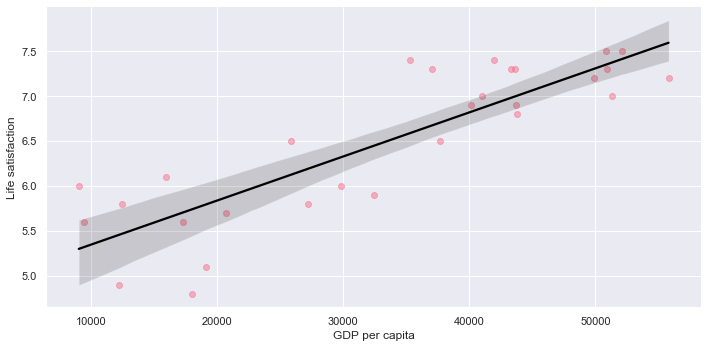

In [6]:
# Scatter and Linear Regression Graph
sns.set(style='darkgrid', palette='husl')
sns.lmplot(x='GDP per capita', y='Life satisfaction', data=country_stats, aspect=2,
           line_kws={'color':'black'}, scatter_kws={'alpha':0.5})
plt.show()

In [8]:
# Variables
X= np.c_[country_stats['GDP per capita']]
Y= np.c_[country_stats['Life satisfaction']]

# Linear Model then KNN Model
model1 = sklearn.linear_model.LinearRegression()
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train Models
model1.fit(X,Y)
model2.fit(X,Y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print("Linear Regression:", model1.predict(X_new)) # Expected prediction: 5.96
print("KNN:", model2.predict(X_new)) # Expected prediction: 5.77

Linear Regression: [[5.96242338]]
KNN: [[5.76666667]]
